In [201]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from openopt import QP

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [202]:
asset_class1 = {"e_return": 0.0250, "std": 0.0500}
asset_class2 = {"e_return": 0.0300, "std": 0.0550}
asset_class3 = {"e_return": 0.0600, "std": 0.0800}
asset_class4 = {"e_return": 0.0750, "std": 0.1000}
corr = [[1.00, 0.40, 0.30, 0.10], [0.40, 1.00, 0.50, 0.40], [0.30, 0.50, 1.00, 0.80], [0.10, 0.40, 0.80, 1.00]]
stds = [asset_class1["std"], asset_class2["std"], asset_class3["std"], asset_class4["std"]]
cov = [[0, 0, 0, 0] for i in range(4)]
for i in range(len(stds)):
    for j in range(len(stds)):
        cov[i][j] = stds[i]*stds[j]*corr[i][j]
cov = np.matrix(cov)
cov

matrix([[ 0.0025  ,  0.0011  ,  0.0012  ,  0.0005  ],
        [ 0.0011  ,  0.003025,  0.0022  ,  0.0022  ],
        [ 0.0012  ,  0.0022  ,  0.0064  ,  0.0064  ],
        [ 0.0005  ,  0.0022  ,  0.0064  ,  0.01    ]])

In [203]:
effr = []
effs = []

for u in list(np.linspace(0.03, 0.07, 100)):
    H = cov
    f = [0, 0, 0, 0]
    Aeq = [[asset_class1["e_return"], asset_class2["e_return"], asset_class3["e_return"], asset_class4["e_return"]], [1,1,1,1]]
    beq = [u,1]
    lb = [0, 0, 0, 0]
    ub =  [1, 1, 1, 1]
    p = QP(H, f=f, Aeq=Aeq, beq=beq, lb=lb, ub=ub)
    r = p.solve("qlcp")
    w_opt = r.xf
    effr.append (w_opt[0]*asset_class1["e_return"] + w_opt[1]*asset_class2["e_return"] + w_opt[2]*asset_class3["e_return"] + w_opt[3]*asset_class4["e_return"])
    w_opt = np.matrix(w_opt)
    effs.append(math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))
    print(w_opt, math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))


------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00             -15.65 
istop: 1000
Solver:   Time Elapsed = 0.01 	CPU Time Elapsed = 0.01
objFuncValue: 0.00092841755 (feasible, MaxResidual = 2.22045e-16)
[[ 0.57925532  0.35638298  0.          0.0643617 ]] 0.04309100957720738

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00             -15.65 
istop: 1000
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
objFuncValue: 0.00092749604 (feasible, MaxResidual = 2.22045e-16)
[[ 0.57620352  0.35079519  0.          0.07300129]] 0.04306961910593165

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)

/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if lb != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  A = vstack([A, -addA]) if A != None else -addA
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  b = concatenate([b, -addb]) if b != None else -addb
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:45: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if ub != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:49: FutureW

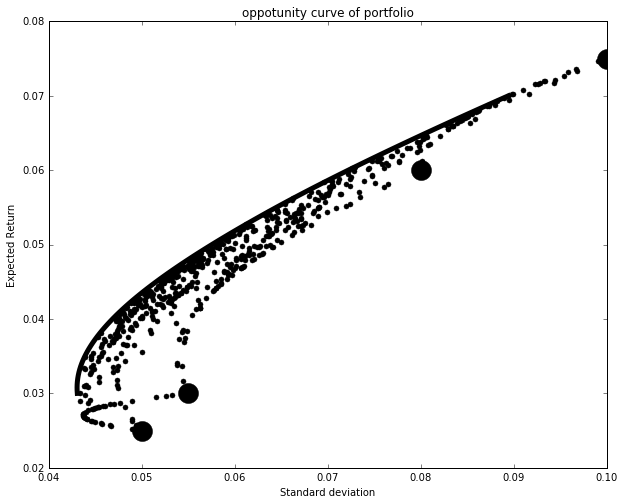

In [204]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("oppotunity curve of portfolio")
plt.xlabel("Standard deviation")
plt.ylabel("Expected Return")

rtnp = []
stdp = []

for i in range(1000):
    a = np.random.uniform()
    
    if a < 0.4:
        w_1 = 0
        w_2 = 0
        w_3 = 0
        w_4 = np.random.uniform()
        w = w_1+ w_2 + w_3 + w_4
        w_1 = w_1/w
        w_2 = w_2/w
        w_3 = w_3/w
        w_4 = w_4/w
        wlist  = [w_1, w_2, w_3, w_4]
        np.random.shuffle(wlist)
        wmatrix = np.matrix(wlist).T
        
    elif 0.4 <= a < 0.6:
        w_1 = 0
        w_2 = 0
        w_3 = np.random.uniform()
        w_4 = np.random.uniform()
        w = w_1+ w_2 + w_3 + w_4
        w_1 = w_1/w
        w_2 = w_2/w
        w_3 = w_3/w
        w_4 = w_4/w
        wlist  = [w_1, w_2, w_3, w_4]
        np.random.shuffle(wlist)
        wmatrix = np.matrix(wlist).T
        
    elif a < 0.8:
        w_1 = 0
        w_2 = np.random.uniform()
        w_3 = np.random.uniform()
        w_4 = np.random.uniform()
        w = w_1+ w_2 + w_3 + w_4
        w_1 = w_1/w
        w_2 = w_2/w
        w_3 = w_3/w
        w_4 = w_4/w
        wlist  = [w_1, w_2, w_3, w_4]
        np.random.shuffle(wlist)
        wmatrix = np.matrix(wlist).T
        
    else:
        w_1 = np.random.uniform()
        w_2 = np.random.uniform()
        w_3 = np.random.uniform()
        w_4 = np.random.uniform()
        w = w_1+ w_2 + w_3 + w_4
        w_1 = w_1/w
        w_2 = w_2/w
        w_3 = w_3/w
        w_4 = w_4/w
        wlist  = [w_1, w_2, w_3, w_4]
        wmatrix = np.matrix(wlist).T
        
    rtnp.append(wlist[0]*asset_class1["e_return"] + wlist[1]*asset_class2["e_return"] + wlist[2]*asset_class3["e_return"] + wlist[3]*asset_class4["e_return"])
    stdp.append(math.sqrt(np.array(wmatrix.T*cov*wmatrix)[0][0]))

plt.plot(stdp, rtnp, "ko", markersize=5)
plt.plot(effs, effr, "k", linewidth=5)    
plt.plot(asset_class1["std"], asset_class1["e_return"], "ko", markersize=20)
plt.plot(asset_class2["std"], asset_class2["e_return"], "ko", markersize=20)
plt.plot(asset_class3["std"], asset_class3["e_return"], "ko", markersize=20)
plt.plot(asset_class4["std"], asset_class4["e_return"], "ko", markersize=20)
plt.show()

In [205]:
import jsm
q = jsm.Quotes()

import datetime

start_date = datetime.date(1996,12, 1)
end_date = datetime.date(2014,12, 1)

nomura = q.get_historical_prices(8604, jsm.MONTHLY, start_date = start_date, end_date = end_date)

nsn= q.get_historical_prices(7201, jsm.MONTHLY, start_date = start_date, end_date = end_date)

toshiba = q.get_historical_prices(6502, jsm.MONTHLY, start_date = start_date, end_date = end_date)

/Users/NIGG/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [206]:
nomura_high_list = [each_month_data.high for each_month_data in nomura]
nomura_low_list = [each_month_data.low for each_month_data in nomura]
nomura_return = []
for i in range(1, len(nomura_high_list)):
    nomura_return.append(((nomura_high_list[i]+nomura_low_list[i])/2)/((nomura_high_list[i-1]+nomura_low_list[i-1])/2)-1)
nomura_return = np.array(nomura_return)

In [207]:
nsn_high_list = [each_month_data.high for each_month_data in nsn]
nsn_low_list = [each_month_data.low for each_month_data in nsn]
nsn_return = []
for i in range(1, len(nsn_high_list)):
    nsn_return.append(((nsn_high_list[i]+nsn_low_list[i])/2)/((nsn_high_list[i-1]+nsn_low_list[i-1])/2)-1)
nsn_return = np.array(nsn_return)

In [208]:
toshiba_high_list = [each_month_data.high for each_month_data in toshiba]
toshiba_low_list = [each_month_data.low for each_month_data in toshiba]
toshiba_return = []
for i in range(1, len(toshiba_high_list)):
    toshiba_return.append(((toshiba_high_list[i]+toshiba_low_list[i])/2)/((toshiba_high_list[i-1]+toshiba_low_list[i-1])/2)-1)
toshiba_return = np.array(toshiba_return)

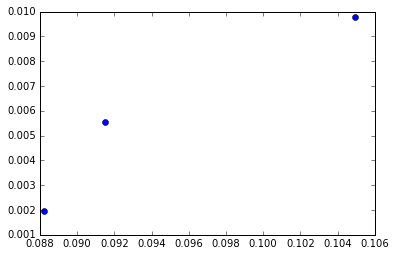

In [209]:
nmr_av = np.average(nomura_return)
nmr_std = np.std(nomura_return)
nsn_av = np.average(nsn_return)
nsn_std = np.std(nsn_return)
tsb_av = np.average(toshiba_return)
tsb_std = np.std(toshiba_return)
plt.plot([nmr_std, nsn_std, tsb_std],[nmr_av, nsn_av, tsb_av], "o")

In [210]:
nmr_nsc_tsb = np.corrcoef([nomura_return, nsn_return, toshiba_return])
nmr_nsc_tsb

array([[ 1.        ,  0.53502897,  0.58720978],
       [ 0.53502897,  1.        ,  0.48133133],
       [ 0.58720978,  0.48133133,  1.        ]])

In [211]:
stds = [nmr_std, nsn_std, tsb_std]
cov = [[0, 0, 0] for i in range(3)]
for i in range(len(stds)):
    for j in range(len(stds)):
        cov[i][j] = stds[i]*stds[j]*nmr_nsc_tsb[i][j]
cov = np.matrix(cov)
cov

matrix([[ 0.01101034,  0.00495225,  0.00563923],
        [ 0.00495225,  0.00778127,  0.00388593],
        [ 0.00563923,  0.00388593,  0.0083763 ]])

In [212]:
effr = []
effs = []

for u in list(np.linspace(0.004, 0.009, 100)):
    H = cov
    f = [0, 0, 0]
    Aeq = [[nmr_av, nsn_av, tsb_av], [1,1,1]]
    beq = [u,1]
    lb = [0, 0, 0]
    ub =  [1, 1, 1]
    p = QP(H, f=f, Aeq=Aeq, beq=beq, lb=lb, ub=ub)
    r = p.solve("qlcp")
    w_opt = r.xf
    effr.append (w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av)
    w_opt = np.matrix(w_opt)
    effs.append(math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))
    print(w_opt, math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))


------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00            -100.00 
istop: 1000
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
objFuncValue: 0.0029524744 (feasible, MaxResidual = 0)
[[ 0.07485309  0.51787222  0.4072747 ]] 0.07684366419094439

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00             -15.95 
istop: 1000
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
objFuncValue: 0.0029507364 (feasible, MaxResidual = 1.11022e-16)
[[ 0.08155544  0.51169171  0.40675285]] 0.0768210445989206

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 

/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if lb != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  A = vstack([A, -addA]) if A != None else -addA
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  b = concatenate([b, -addb]) if b != None else -addb
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:45: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if ub != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:49: FutureW

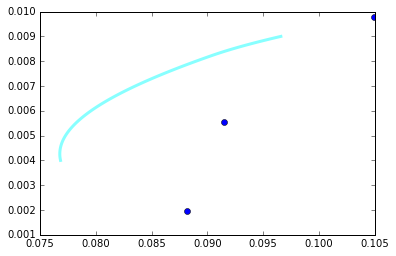

In [213]:
plt.plot(effs, effr, '#88ffff', linewidth=3)    
plt.plot([nmr_std, nsn_std, tsb_std],[nmr_av, nsn_av, tsb_av], "o")


------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00             -18.36 
istop: 1000
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
objFuncValue: 0.0028158033 (feasible, MaxResidual = 4.33681e-19)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FE

/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if lb != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  A = vstack([A, -addA]) if A != None else -addA
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  b = concatenate([b, -addb]) if b != None else -addb
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:45: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if ub != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:49: FutureW

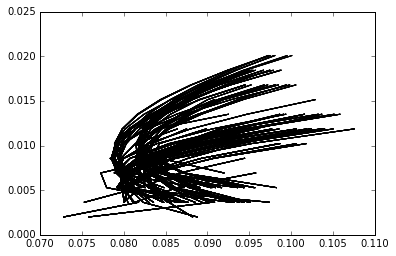

In [245]:
for i in range(97):
    nmr_av = np.average(nomura_return[-120-i-1:-i-1])
    nmr_std = np.std(nomura_return[-120-i-1:-i-1])
    nsn_av = np.average(nsn_return[-120-i-1:-i-1])
    nsn_std = np.std(nsn_return[-120-i-1:-i-1])
    tsb_av = np.average(toshiba_return[-120-i-1:-i-1])
    tsb_std = np.std(toshiba_return[-120-i-1:-i-1])
    
    nmr_nsc_tsb = np.corrcoef([nomura_return, nsn_return, toshiba_return])
    nmr_nsc_tsb
    
    stds = [nmr_std, nsn_std, tsb_std]
    cov = [[0, 0, 0] for i in range(3)]
    for i in range(len(stds)):
        for j in range(len(stds)):
            cov[i][j] = stds[i]*stds[j]*nmr_nsc_tsb[i][j]
    cov = np.matrix(cov)
    
    effr = []
    effs = []

    for u in list(np.linspace(0.002, 0.025, 15)):
        H = cov
        f = [0, 0, 0]
        Aeq = [[nmr_av, nsn_av, tsb_av], [1,1,1]]
        beq = [u,1]
        lb = [0, 0, 0]
        ub =  [1, 1, 1]
        p = QP(H, f=f, Aeq=Aeq, beq=beq, lb=lb, ub=ub)
        r = p.solve("qlcp")
        w_opt = r.xf
        if w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av > 0.002:
            effr.append (w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av)
            w_opt = np.matrix(w_opt)
            effs.append(math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))
        plt.plot(effs, effr, "k", linewidth=1)    


------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------

/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if lb != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  A = vstack([A, -addA]) if A != None else -addA
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  b = concatenate([b, -addb]) if b != None else -addb
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:45: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if ub != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:49: FutureW


problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

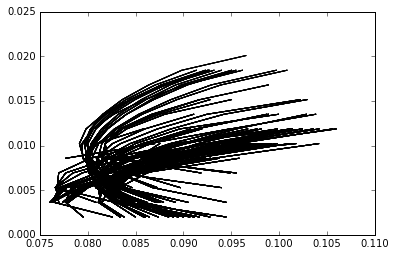

In [244]:
for i in range(73):
    nmr_av = np.average(nomura_return[-144-i-1:-i-1])
    nmr_std = np.std(nomura_return[-144-i-1:-i-1])
    nsn_av = np.average(nsn_return[-144-i-1:-i-1])
    nsn_std = np.std(nsn_return[-144-i-1:-i-1])
    tsb_av = np.average(toshiba_return[-144-i-1:-i-1])
    tsb_std = np.std(toshiba_return[-144-i-1:-i-1])
    
    nmr_nsc_tsb = np.corrcoef([nomura_return, nsn_return, toshiba_return])
    nmr_nsc_tsb
    
    stds = [nmr_std, nsn_std, tsb_std]
    cov = [[0, 0, 0] for i in range(3)]
    for i in range(len(stds)):
        for j in range(len(stds)):
            cov[i][j] = stds[i]*stds[j]*nmr_nsc_tsb[i][j]
    cov = np.matrix(cov)
    
    effr = []
    effs = []

    for u in list(np.linspace(0.002, 0.025, 15)):
        H = cov
        f = [0, 0, 0]
        Aeq = [[nmr_av, nsn_av, tsb_av], [1,1,1]]
        beq = [u,1]
        lb = [0, 0, 0]
        ub =  [1, 1, 1]
        p = QP(H, f=f, Aeq=Aeq, beq=beq, lb=lb, ub=ub)
        r = p.solve("qlcp")
        w_opt = r.xf
        if w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av > 0.002:
            effr.append (w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av)
            w_opt = np.matrix(w_opt)
            effs.append(math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))
        plt.plot(effs, effr, "k", linewidth=1)    

In [265]:
w_005 = []
w_01 = []


for i in range(97):
    nmr_av = np.average(nomura_return[-120-i-1:-i-1])
    nmr_std = np.std(nomura_return[-120-i-1:-i-1])
    nsn_av = np.average(nsn_return[-120-i-1:-i-1])
    nsn_std = np.std(nsn_return[-120-i-1:-i-1])
    tsb_av = np.average(toshiba_return[-120-i-1:-i-1])
    tsb_std = np.std(toshiba_return[-120-i-1:-i-1])
    
    nmr_nsc_tsb = np.corrcoef([nomura_return, nsn_return, toshiba_return])
    nmr_nsc_tsb
    
    stds = [nmr_std, nsn_std, tsb_std]
    cov = [[0, 0, 0] for i in range(3)]
    for i in range(len(stds)):
        for j in range(len(stds)):
            cov[i][j] = stds[i]*stds[j]*nmr_nsc_tsb[i][j]
    cov = np.matrix(cov)
    
    effr = []
    effs = []
    
    for u in [0.005,0.01]:
        H = cov
        f = [0, 0, 0]
        Aeq = [[nmr_av, nsn_av, tsb_av], [1,1,1]]
        beq = [u,1]
        lb = [0, 0, 0]
        ub =  [1, 1, 1]
        p = QP(H, f=f, Aeq=Aeq, beq=beq, lb=lb, ub=ub)
        r = p.solve("qlcp")
        w_opt = r.xf
        if w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av > 0.002:
            effr.append (w_opt[0]*nmr_av + w_opt[1]*nsn_av + w_opt[2]*tsb_av)
            w_opt = np.matrix(w_opt)
            effs.append(math.sqrt(np.array(w_opt*cov*w_opt.T)[0][0]))
            if u == 0.005:
                w_005.append(w_opt)
            else:
                w_01.append(w_opt)


------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO

/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if lb != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  A = vstack([A, -addA]) if A != None else -addA
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  b = concatenate([b, -addb]) if b != None else -addb
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:45: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if ub != None:
/Users/NIGG/anaconda/lib/python3.5/site-packages/openopt/solvers/HongKongOpt/QPSolve.py:49: FutureW


    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unnamed   type: QP
solver: qlcp
  iter  objFunVal  log10(maxResidual)  
    0  0.000e+00               0.00 
    1  0.000e+00               0.00 
istop: -1
Solver:   Time Elapsed = 0.0 	CPU Time Elapsed = 0.0
NO FEASIBLE SOLUTION has been obtained (MaxResidual = 1, objFunc = 0)

------------------------- OpenOpt 0.5625 -------------------------
problem: unn

In [266]:
w_005 = np.array(w_005)
w_01 = np.array(w_01)

In [267]:
for i in range(len(w_005)):
    w_005[i][0][0] = w_005[i][0][0]
    w_005[i][0][1] = w_005[i][0][0] + w_005[i][0][1]
    w_005[i][0][2] = w_005[i][0][1] + w_005[i][0][2]
    
for i in range(len(w_01)):
    w_01[i][0][0] = w_01[i][0][0]
    w_01[i][0][1] = w_01[i][0][0] + w_01[i][0][1]
    w_01[i][0][2] = w_01[i][0][1] + w_01[i][0][2]


In [262]:
w_005[0][0]

array([ 0.9968669,  1.9937338,  2.9937338])

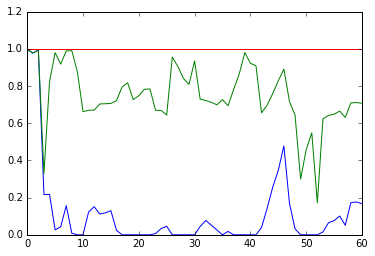

In [268]:
plt.plot([w[0] for w in w_005])

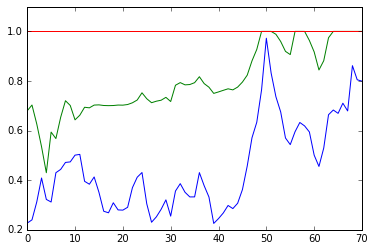

In [269]:
plt.plot([w[0] for w in w_01])